In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

0 0.014977249
500 0.00087518035
1000 0.00066484266
1500 0.00056765723


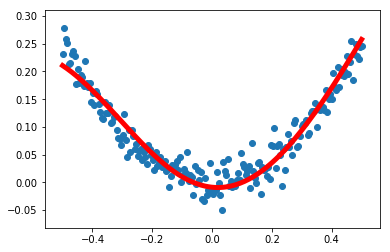

In [34]:
# generate data
x_data=np.linspace(-.5,.5,200)[:,np.newaxis]# good trick!convert a vector to a matrix
noise=np.random.normal(0,0.02,x_data.shape)
y_data=np.square(x_data)+noise

#define model
x=tf.placeholder(tf.float32,[None,1])
y=tf.placeholder(tf.float32,[None,1])

#define hidden network
weights_l1=tf.Variable(tf.random_normal([1,10]))
bias_l1=tf.Variable(tf.zeros([1,10]))
Wx_plus_b_l1=tf.matmul(x,weights_l1)+bias_l1
l1=tf.nn.tanh(Wx_plus_b_l1)

#output
weights_l2=tf.Variable(tf.random_normal([10,1]))
bias_l2=tf.Variable(tf.zeros([1,1]))
Wx_plus_b_l2=tf.matmul(l1,weights_l2)+bias_l2
y_predict=tf.nn.tanh(Wx_plus_b_l2)

#loss
loss=tf.reduce_mean(tf.square(y_data-y_predict))
#optimizer
opt=tf.train.GradientDescentOptimizer(0.1)
train=opt.minimize(loss)

init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for step in range(2000):
        _,loss_value=sess.run([train,loss],feed_dict={x:x_data,y:y_data})
        if step%500==0:
            print(step,loss_value)
    prediction=sess.run(y_predict,feed_dict={x:x_data})
    
    #plot
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction,'r-',lw=5)
    plt.show()
